# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [3]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [ ]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

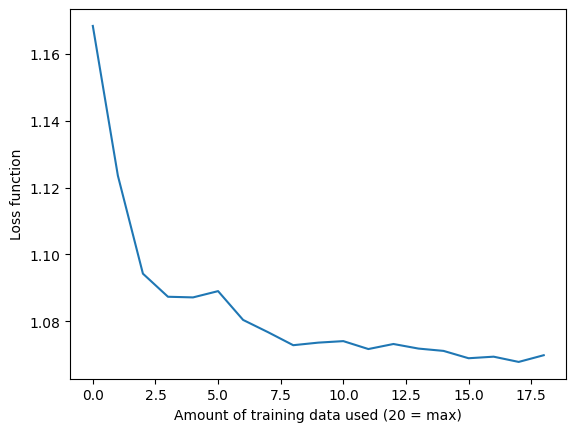

In [13]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [14]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

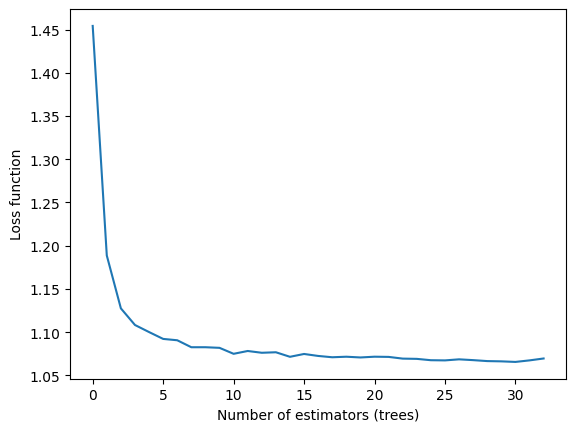

In [15]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

I think that loss vs amount of training data used is the more useful graph.  This graph is helpful because it starts to give a pciture of what is causing the errors in the model and whether addign more data would help make the model better.  This graph shows us that the closer we get to the max number of samples, the slower the models performance is to the maximum performance possible. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
austin_data = pd.read_csv('austinHousingData.csv')
austin_data

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg
15169,29392029,austin,2000 Chestnut Ave,78722,So many options at this address in the eclecti...,30.281569,-97.717789,1.98,0,False,...,1,1,1.300000,6.666667,1057,15,2.0,4,1,29392029_a9a8306ea363d23f37d91d37975a1b96-p_f.jpg


In [9]:
austin_numeric = austin_data.select_dtypes(include=["number"])

In [10]:
austin_x = austin_numeric.drop(columns=["latestPrice"])
austin_y= austin_numeric["latestPrice"]
austin_x_train, austin_x_test, austin_y_train, austin_y_test = train_test_split(austin_x, austin_y, test_size=0.2, random_state=27)
austin_rf = RandomForestRegressor()
austin_rf.fit(austin_x_train, austin_y_train)

RandomForestRegressor()

In [11]:
austin_y_pred = austin_rf.predict(austin_x_test)

In [12]:
austin_rmse = root_mean_squared_error(austin_y_test, austin_y_pred)
austin_rmse

267720.015628336

In [14]:
austin_r2 = r2_score(austin_y_test, austin_y_pred)
austin_r2

0.5939670903318333

In [16]:
listing_df = pd.read_csv('listings.csv')
listing_df['price'] = (listing_df['price'].str.replace(r'[\$,]', '', regex=True).astype(float))
airbnb_numeric = listing_df.select_dtypes(include=["number"])
airbnb_clean = airbnb_numeric.dropna(subset=['price'])

In [17]:
airbnb_x = airbnb_clean.drop(columns=['price'])
airbnb_y= airbnb_clean['price']
airbnb_x_train, airbnb_x_test, airbnb_y_train, airbnb_y_test = train_test_split(airbnb_x, airbnb_y, test_size=0.2, random_state=42)
airbnb_rf = RandomForestRegressor()
airbnb_rf.fit(airbnb_x_train, airbnb_y_train)

RandomForestRegressor()

In [18]:
airbnb_y_pred = airbnb_rf.predict(airbnb_x_test)

In [19]:
airbnb_rmse = root_mean_squared_error(airbnb_y_test, airbnb_y_pred)
airbnb_rmse

345.2902492171471

In [22]:
airbnb_clean['price'].agg(['min', 'max', 'mean'])

min        10.000000
max     38143.000000
mean      270.077809
Name: price, dtype: float64

In [20]:
airbnb_r2 = r2_score(airbnb_y_test, airbnb_y_pred)
airbnb_r2

0.7800059039707201

In [23]:
import matplotlib.pyplot as plt 

In [24]:
importances = airbnb_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = airbnb_x.columns

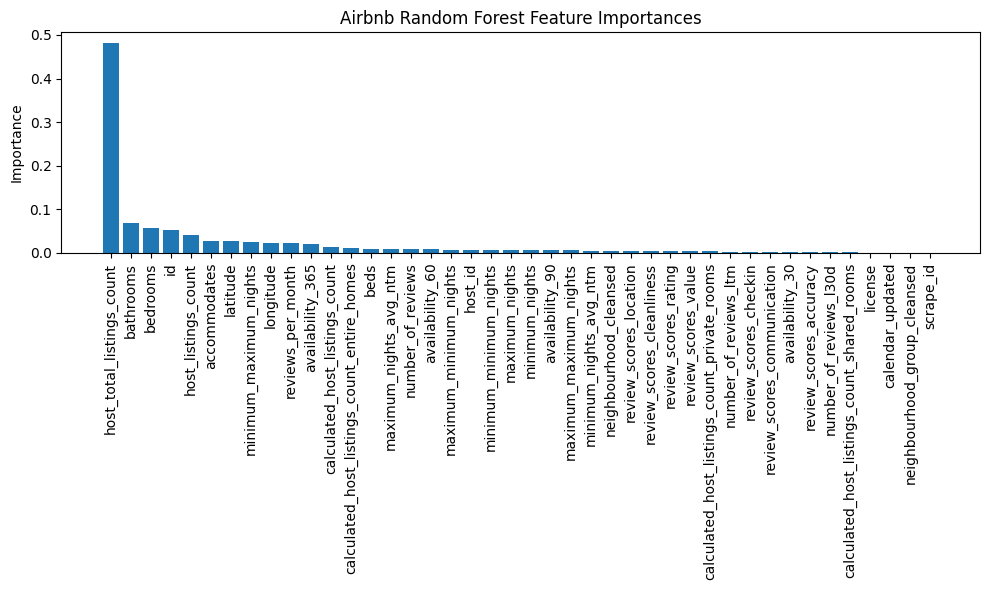

In [25]:
plt.figure(figsize=(10,6))
plt.title("Airbnb Random Forest Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Chat GPT Convo - I asked how best to visualize a random forest model and adapted the code to create the bar chart of feature importances. 
Here are several effective ways to “graph” or visualize different aspects of a trained Random Forest in scikit-learn. Pick the ones that best suit your goal—whether it’s model interpretation, debugging, or just communicating results.

---

## 1. Feature‐Importance Bar Chart  
Shows which inputs the forest relied on most.

```python
import matplotlib.pyplot as plt
import numpy as np

# assume rf is your fitted RandomForestRegressor and X_train your DataFrame of features
importances = rf.feature_importances_
indices     = np.argsort(importances)[::-1]
features    = X_train.columns

plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
```

---

## 2. Plot a Single Tree from the Forest  
Dig into the structure of one of the ensemble’s decision trees.

```python
from sklearn import tree
import matplotlib.pyplot as plt

# Plot only the first tree, and only down to depth=3 for readability:
plt.figure(figsize=(20,10))
tree.plot_tree(
    rf.estimators_[0],
    feature_names=X_train.columns,
    filled=True,
    max_depth=3,
    fontsize=10
)
plt.show()
```

If you need publication‐quality diagrams, you can export to Graphviz:

```python
from sklearn.tree import export_graphviz
export_graphviz(
    rf.estimators_[0],
    out_file="tree.dot",
    feature_names=X_train.columns,
    rounded=True,
    filled=True
)
# Then convert with: dot -Tpng tree.dot -o tree.png
```

---

## 3. Partial Dependence Plots (PDPs)  
Show how the model’s prediction changes as you vary one (or two) features, marginalizing over the others.

```python
from sklearn.inspection import PartialDependenceDisplay

# For one feature:
PartialDependenceDisplay.from_estimator(rf, X_train, ['square_feet'], grid_resolution=50)
plt.show()

# For two features (a contour plot):
PartialDependenceDisplay.from_estimator(rf, X_train, [('square_feet','num_bedrooms')], grid_resolution=25)
plt.show()
```

---

## 4. Out‐of‐Bag (OOB) Error vs. Number of Trees  
If you trained with `oob_score=True`, you can track how OOB error changes as you add trees.

```python
# Re-fit with tracking each estimator’s OOB score:
rf_oob = RandomForestRegressor(
    n_estimators=200, oob_score=True, bootstrap=True, random_state=42
).fit(X_train, y_train)

# Unfortunately sklearn doesn’t store OOB error per tree by default.
# You can loop manually to record:
oob_errors = []
for n in range(10, 201, 10):
    rf_temp = RandomForestRegressor(
        n_estimators=n, oob_score=True, bootstrap=True, random_state=42
    ).fit(X_train, y_train)
    oob_errors.append(1 - rf_temp.oob_score_)

plt.plot(range(10,201,10), oob_errors)
plt.xlabel("n_estimators")
plt.ylabel("OOB error")
plt.title("OOB Error vs. # Trees")
plt.show()
```

---

## 5. Learning Curve (Train vs. Validation Error)  
See how model performance evolves with more data.

```python
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    rf, X_train, y_train,
    train_sizes=np.linspace(0.1,1.0,5),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

train_errors = -train_scores.mean(axis=1)
val_errors   = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label="Train RMSE")
plt.plot(train_sizes, val_errors,   label="Validation RMSE")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.title("Learning Curve")
plt.show()
```

---

### Which to choose?

- **Feature importances** are the quickest “at a glance” summary.  
- **Single‐tree plots** help debug or illustrate depth/splits.  
- **PDPs** reveal non-linear relationships learned by the forest.  
- **OOB‐error curves** show if more trees still help.  
- **Learning curves** diagnose under/over-fitting versus data size.

Mix and match depending on what story you need to tell about your Random Forest.


Because I was using the argsort function from the ChatGPT code I made sure to read the documenation for the function located here: https://numpy.org/doc/2.1/reference/generated/numpy.argsort.html

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

N/a - there are no graphs in this chapter. 